## Logistic Regression

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, classification_report, roc_auc_score, roc_curve, brier_score_loss, mean_squared_error, r2_score
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('CMU_resample.csv')
data

,CustomerID,invoice_count,total_products,avg_purchase_frequency,avg_spend_ttm,label
0,15185,1,666,0.000000,31.062,0
1,17131,5,983,0.526316,246.317,0
2,16475,4,319,6.851852,54.430,0
3,13854,29,2278,3.159292,802.502,0
4,14741,6,841,6.224138,140.034,0
...,...,...,...,...,...,...
1695,15858,5,1167,1.852632,143.885,0
1696,13344,3,971,1.779661,254.372,1
1697,16924,4,480,0.715909,73.950,0
1698,13003,3,103,21.800000,14.905,0


In [4]:
final_data = data.iloc[:,1:5]
final_data

,invoice_count,total_products,avg_purchase_frequency,avg_spend_ttm
0,1,666,0.000000,31.062
1,5,983,0.526316,246.317
2,4,319,6.851852,54.430
3,29,2278,3.159292,802.502
4,6,841,6.224138,140.034
...,...,...,...,...
1695,5,1167,1.852632,143.885
1696,3,971,1.779661,254.372
1697,4,480,0.715909,73.950
1698,3,103,21.800000,14.905


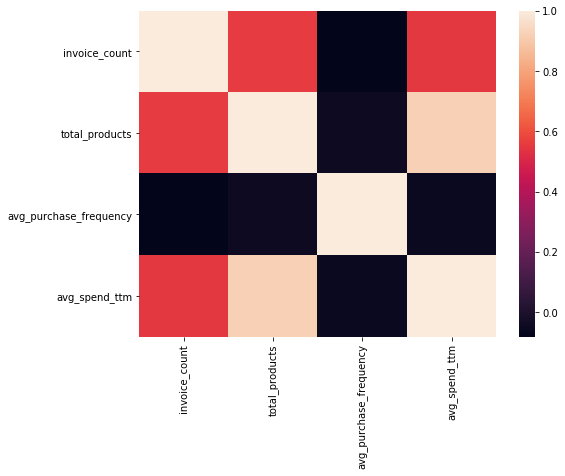

In [5]:
import seaborn as sns
# Visualize the feature correlations
    # You can compute the correlation among features and display a heat-map of the matrix 
    # OR use sns scatter or pairplot
correlation=final_data.corr()
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(correlation, ax=ax)
plt.show()

In [6]:
def visualize_float_columns():
    '''
    This function visualizes Box-and-whisker plots for continuous variables
    '''
    
    # FLoat columns
    for i in final_data.columns:
        sns.displot(final_data[i])

        plt.show()

In [7]:
sns.__version__

'0.11.0'

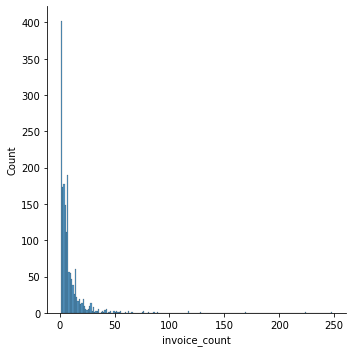

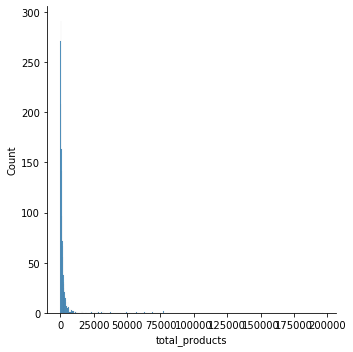

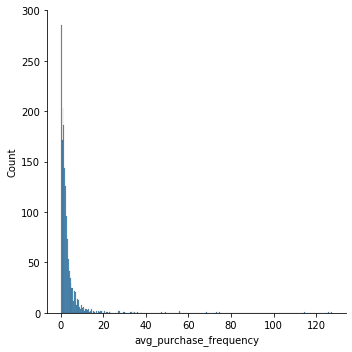

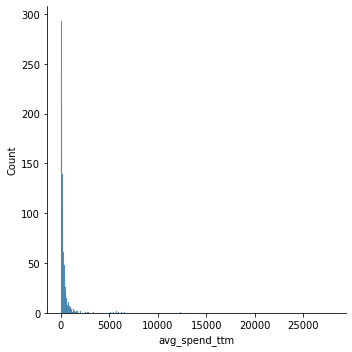

In [8]:
visualize_float_columns()

In [47]:
X = pd.DataFrame(data.iloc[:, 1:5])
y = data.loc[:, 'label']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)



In [48]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(x_train, y_train)

In [42]:
model = LogisticRegression(random_state = 0, solver = 'liblinear', penalty = 'l2', class_weight = 'balanced')
cv_parameters = {'C' : [10.**c for c in np.arange(-5., 5.)]}
clf = GridSearchCV(model, cv_parameters)
clf.fit(X_res, y_res)
best_model = clf.best_estimator_
print(best_model)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [49]:
model = LogisticRegression(random_state = 0, solver = 'liblinear', penalty = 'l2', class_weight = 'balanced')

In [50]:
model.fit(X_res, y_res)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,

In [52]:
accuracy_score(y_test, y_pred)

0.44901960784313727

In [43]:
y_pred_probs = best_model.predict_proba(x_test)[:,1]
y_pred_probs

array([6.49558523e-01, 6.17646152e-01, 5.69427254e-01, 4.96005532e-01,
       6.55383641e-01, 6.10197445e-01, 3.58525506e-03, 6.01056435e-01,
       6.72473004e-01, 5.30433089e-01, 3.86367812e-01, 4.17588921e-01,
       4.73294240e-01, 6.47005909e-01, 6.06288857e-01, 5.55420746e-01,
       5.38501841e-01, 6.03657634e-01, 1.46483658e-01, 6.56448042e-01,
       1.64926434e-01, 3.12122243e-03, 5.84717965e-01, 6.13094897e-01,
       5.27000208e-01, 5.31844168e-01, 6.02920955e-01, 6.39779873e-01,
       6.48991538e-01, 1.28566958e-01, 5.40967922e-01, 6.53081911e-01,
       5.75942879e-01, 5.97554426e-01, 6.77475509e-01, 5.61341860e-01,
       6.16481752e-01, 5.36099888e-01, 3.85651558e-01, 4.63605354e-01,
       5.23155727e-01, 4.36540113e-01, 4.69087675e-01, 5.00091992e-01,
       4.82296935e-01, 1.79589510e-01, 5.70113273e-01, 4.23141080e-01,
       5.86925983e-01, 5.06195584e-01, 6.26473565e-01, 1.54881151e-02,
       6.53441476e-01, 5.64347520e-01, 5.93277529e-01, 6.95292668e-01,
      

Text(0.5, 0, 'False Positive Rate')

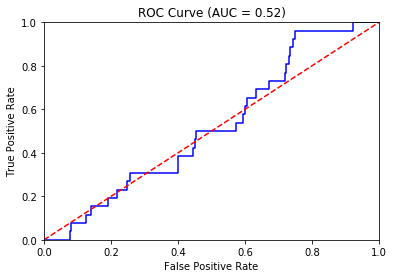

In [44]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.title("ROC Curve (AUC = %0.2f)"% roc_auc_score(y_test, y_pred_probs))
plt.plot(fpr, tpr, 'b')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1]); plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [45]:
y_pred =  best_model.predict(x_test)
y_pred


array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,

In [46]:
accuracy_score(y_test, y_pred)

0.4294117647058823